In [2]:
import pandas as pd
import os
from sklearn.neighbors import KNeighborsClassifier

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np

In [6]:
df = pd.read_csv('Position CSV/DB_stacked.csv')
df.head()

,name,approximate_value,games.x,AVp16,X1,adjusted_yards_per_attempt,assists_on_tackles,completed_passes,extra_points_made,field_goals_made,...,total_touchdowns,two_point_conversions,weight,yards_from_scrimmage,yards_from_scrimmage_per_play,yards_recovered_from_fumble,yards_returned_from_interceptions,yards_returned_per_interception,year,X
0,Hamza Abdullah,5,48,1.666667,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,NaN,Career
1,Husain Abdullah,21,97,3.463918,Career,NaN,80.0,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,172.0,17.2,NaN,NaN
2,Kenneth Acker,7,40,2.800000,Career,NaN,30.0,NaN,0.0,0.0,...,2.0,NaN,195.0,NaN,NaN,0.0,102.0,14.6,NaN,NaN
3,Anthony Adams,37,121,4.892562,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,106.0,21.2,NaN,Career
4,Jahleel Addae,24,96,4.000000,Career,NaN,155.0,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,0.0,74.0,9.3,NaN,NaN


In [7]:
df.drop(['name', 'approximate_value', 'games.x', 'X1', 'height', 'player_id', 'position', 'team_abbreviation', 'season', 'year', 'X'], axis=1, inplace=True)

In [8]:
df.fillna(0, inplace=True)

In [30]:
for col in df.columns: 
    print(col) 

AVp16
adjusted_yards_per_attempt
assists_on_tackles
completed_passes
extra_points_made
field_goals_made
fumbles_forced
fumbles_recovered
fumbles_recovered_for_touchdown
games.y
interceptions
interceptions_returned_for_touchdown
interceptions_thrown
kickoff_return_touchdowns
other_touchdowns
pass_attempts
passes_defended
passing_completion
passing_touchdowns
passing_yards
passing_yards_per_attempt
plays_from_scrimmage
points
punt_return_touchdowns
quarterback_rating
receiving_touchdowns
receiving_yards
receiving_yards_per_reception
receptions
rush_attempts
rush_touchdowns
rush_yards
rush_yards_per_attempt
rushing_and_receiving_touchdowns
sacks
safeties
solo_tackles
tackles_for_loss
total_tackles
total_touchdowns
two_point_conversions
weight
yards_from_scrimmage
yards_from_scrimmage_per_play
yards_recovered_from_fumble
yards_returned_from_interceptions
yards_returned_per_interception


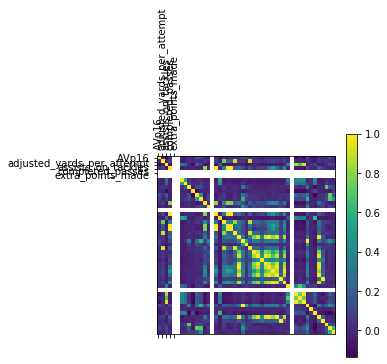

In [10]:
plt.matshow(df.corr())
plt.xticks(np.arange(5), df.columns, rotation=90)
plt.yticks(np.arange(5), df.columns, rotation=0)
plt.colorbar()
plt.show()

#from IPython.display import Image
#img=plt.to_image(format="png")
#Image(img)

In [11]:
from sklearn.model_selection import train_test_split

X = np.asarray(df[['adjusted_yards_per_attempt', 'assists_on_tackles', 'completed_passes', 'extra_points_made', 'field_goals_made', 'fumbles_forced', 'fumbles_recovered', 'fumbles_recovered_for_touchdown', 'interceptions', 'interceptions_returned_for_touchdown', 'interceptions_thrown', 'kickoff_return_touchdowns', 'other_touchdowns', 'pass_attempts', 'passes_defended', 'passing_completion', 'passing_touchdowns', 'passing_yards', 'passing_yards_per_attempt', 'plays_from_scrimmage', 'points', 'punt_return_touchdowns', 'quarterback_rating', 'receiving_touchdowns', 'receiving_yards', 'receiving_yards_per_reception', 'receptions', 'rush_attempts', 'rush_touchdowns', 'rush_yards', 'rush_yards_per_attempt', 'rushing_and_receiving_touchdowns', 'sacks', 'safeties', 'solo_tackles', 'tackles_for_loss', 'total_tackles', 'total_touchdowns', 'two_point_conversions', 'yards_from_scrimmage', 'yards_from_scrimmage_per_play', 'yards_recovered_from_fumble', 'yards_returned_from_interceptions', 'yards_returned_per_interception']])
Y = np.asarray(df['AVp16'])
                  

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, shuffle= True)

Score:  -8.048199318712113e+21
Weights:  [-3.24094823e+10 -1.37204672e-03  1.29717278e+09  7.72309303e-03
 -8.54480267e-03  1.49307773e-01  4.90632154e-02 -2.38342053e-01
  9.62317374e-02  2.56428882e-01 -1.60608868e+09 -5.89110388e-01
  1.18255615e-03 -2.67108991e+00 -2.03527635e-02  6.15686103e+09
 -1.78653367e+09 -7.63065004e+07  8.43123840e+10 -1.34844911e-03
  2.69595444e-01  2.63349767e-01 -6.16983276e+09  1.25233550e-03
 -1.45953688e-03  9.96113035e-02 -3.95930190e-02  4.49055478e-02
 -6.75212366e-01 -1.49283910e-02  9.91267340e-01 -6.73968653e-01
 -5.61930634e-02  0.00000000e+00 -9.56245661e-03  3.92595421e-02
  1.74424982e-03 -1.49507788e+00  0.00000000e+00  8.61831055e-03
 -9.83221124e-01  3.03851979e-04  4.45674063e-04 -2.40351333e-02]


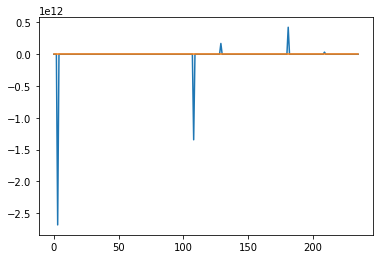

In [12]:
from sklearn.linear_model import LinearRegression

lineReg = LinearRegression()
lineReg.fit(X_train, y_train)
print('Score: ', lineReg.score(X_test, y_test))
print('Weights: ', lineReg.coef_)

plt.plot(lineReg.predict(X_test))
plt.plot(y_test)
plt.show()

In [26]:
from sklearn.model_selection import train_test_split

X = np.asarray(df[['sacks', 'tackles_for_loss', 'fumbles_forced', 'fumbles_recovered', 'adjusted_yards_per_attempt']])
Y = np.asarray(df['AVp16'])

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, shuffle= True)

Score:  0.0006508265643940803
Weights:  [ 0.07287379 -0.01374293  0.0204284  -0.1296346   0.01183524]


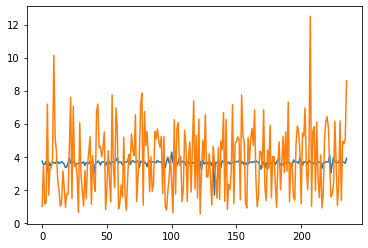

In [27]:
from sklearn.linear_model import LinearRegression

lineReg = LinearRegression()
lineReg.fit(X_train, y_train)
print('Score: ', lineReg.score(X_test, y_test))
print('Weights: ', lineReg.coef_)

plt.plot(lineReg.predict(X_test))
plt.plot(y_test)
plt.show()

Score:  0.0006565122606717599
Weights:  [ 0.07281643 -0.01373215  0.02026181 -0.12930263  0.01183635]


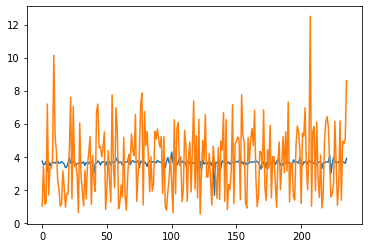

In [28]:
from sklearn import linear_model
reg = linear_model.Ridge (alpha = .5)
reg.fit(X_train, y_train)
print('Score: ', reg.score(X_test, y_test))
print('Weights: ', reg.coef_)

plt.plot(reg.predict(X_test))
plt.plot(y_test)
plt.show()

In [29]:
scores = []
coefs = []
for i in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, shuffle= True)
    lineReg = LinearRegression()
    lineReg.fit(X_train, y_train)
    scores.append(lineReg.score(X_test, y_test))
    coefs.append(lineReg.coef_)
print('Linear Regression')
print(np.mean(scores))
print(np.mean(coefs, axis=0))

scores = []
coefs = []
for i in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, shuffle= True)
    lineReg = linear_model.Ridge (alpha = .5)
    lineReg.fit(X_train, y_train)
    scores.append(lineReg.score(X_test, y_test))
    coefs.append(lineReg.coef_)
print('\nRidge Regression')
print(np.mean(scores))
print(np.mean(coefs, axis=0))

Linear Regression
-0.030477865727408373
[ 0.0758203  -0.02637772  0.06306585 -0.11491918  0.00588203]

Ridge Regression
-0.028121605223765996
[ 0.07536114 -0.02705125  0.06595245 -0.11241517  0.00191137]
